In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df=pd.read_csv("AAPL - AAPL.csv")

In [3]:
df

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
1,2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2,2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
3,2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
4,2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,2020-08-07,452.82,454.70,441.17,444.45,49453300,27.954399,455.316298,343.498702,454.79,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,450.91
3728,2020-08-10,450.40,455.10,440.00,450.91,53100900,29.847338,462.586675,343.197325,444.45,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,437.50
3729,2020-08-11,447.88,449.93,436.43,437.50,46975600,30.576290,466.543079,344.237921,450.91,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,452.04
3730,2020-08-12,441.99,453.10,441.19,452.04,41486200,32.050532,472.583564,344.381436,437.50,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,460.04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3732 non-null   object 
 1   Open              3732 non-null   float64
 2   High              3732 non-null   float64
 3   Low               3732 non-null   float64
 4   Close(t)          3732 non-null   float64
 5   Volume            3732 non-null   int64  
 6   SD20              3732 non-null   float64
 7   Upper_Band        3732 non-null   float64
 8   Lower_Band        3732 non-null   float64
 9   S_Close(t-1)      3732 non-null   float64
 10  S_Close(t-2)      3732 non-null   float64
 11  S_Close(t-3)      3732 non-null   float64
 12  S_Close(t-5)      3732 non-null   float64
 13  S_Open(t-1)       3732 non-null   float64
 14  MA5               3732 non-null   float64
 15  MA10              3732 non-null   float64
 16  MA20              3732 non-null   float64


In [5]:
df = df.rename(columns={'Close(t)':'Close'})
df.head()

,Date,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
1,2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2,2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
3,2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
4,2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


In [6]:
df.shape

(3732, 64)

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

<Axes: >

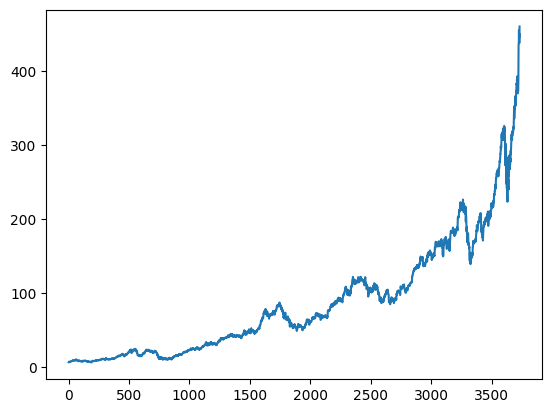

In [9]:
df['Close'].plot()

In [27]:
df=df.drop(columns='Date')


In [28]:
df.isna()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3728,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3729,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3730,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
df.isna().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
                ..
SnP(t-5)         0
DJIA_Close       0
DJIA(t-1))       0
DJIA(t-5)        0
Close_forcast    0
Length: 62, dtype: int64

In [30]:
x=df.drop(columns='Close_forcast')

In [31]:
y=df['Close_forcast']

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [33]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [34]:
lr.coef_

array([-8.02951549e-02,  1.41958892e-01,  2.58713797e-01, -1.38107297e+00,
        1.24160350e-09, -1.27127620e-02, -1.49770889e-01, -9.88768867e-02,
       -1.40576003e+00, -7.08865561e-01, -4.47781386e-01, -4.43556261e-01,
       -3.33762401e-02, -1.15586007e+00, -1.11997874e+00, -1.24321467e-01,
        1.51235905e-01,  2.82769344e-02,  1.51549189e+00,  1.51549189e+00,
        1.51549189e+00,  1.51549189e+00,  1.51549189e+00, -4.46336162e-01,
        8.87577147e-01,  1.87147289e-01,  1.66144853e-03, -1.02756692e-12,
       -1.89413945e-02,  2.11753316e-03,  4.42909211e-03,  4.42844138e-03,
       -1.14148485e+01, -1.10941389e-09, -2.54720689e-11, -1.41276944e-02,
       -1.81023783e-02,  1.01553173e-02, -2.63428660e-03,  4.26103903e-01,
       -2.12586360e-01, -6.97573709e-01, -8.04242246e-02,  2.21361179e+00,
       -1.08135723e-13, -1.04435500e-01, -4.68719705e-02, -3.02189742e-01,
       -1.70048633e-01,  1.01977536e-01, -1.81289986e-03, -2.96940462e-02,
       -2.74764154e-02,  

In [35]:
lr.intercept_

95.57516536347127

In [36]:
lr.score(xtrain,ytrain)

0.9991247011916671

In [39]:
ypred=lr.predict(xtest)

In [40]:
metrics.mean_absolute_error(ytest,ypred)

1.2437301966724754

In [41]:
metrics.r2_score(ytest,ypred)

0.9989243375699739

In [42]:
metrics.mean_squared_error(ytest,ypred)

6.812385609083958

In [46]:
df1=pd.DataFrame(ytest.values,columns=['actual'])

In [47]:
df1

,actual
0,55.55
1,155.52
2,11.23
3,11.15
4,163.13
...,...
742,43.02
743,15.30
744,17.53
745,72.48


In [48]:
df1['predicted']=ypred

In [49]:
df1

,actual,predicted
0,55.55,52.730956
1,155.52,155.915093
2,11.23,10.598524
3,11.15,10.976693
4,163.13,164.460614
...,...,...
742,43.02,42.928119
743,15.30,15.977212
744,17.53,17.738846
745,72.48,72.423698


<Axes: >

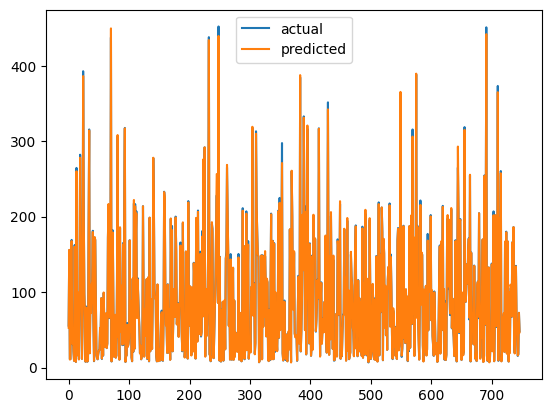

In [51]:
df1[['actual','predicted']].plot()

<Axes: >

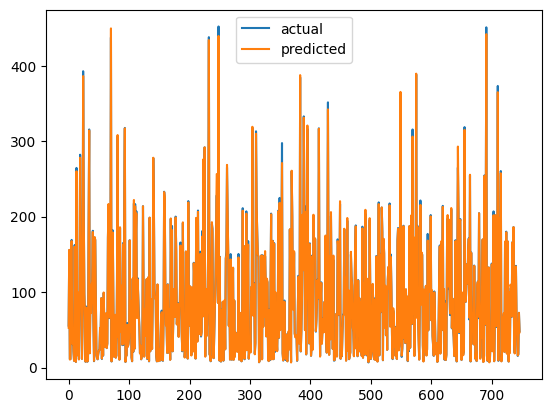

In [53]:
df1[['actual', 'predicted']].plot()